In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Student Performance Indicator



Life Cycle of Machine Learning Project

Understanding the problem Statement
Data collection

Data Check to perform\
Exploratory Data Analysis\
Data pre-Processing\
Model Training\
choose best mode\l

1) Problem Statement\
This project understands how the students performance (test scors ) is 
affected by other variables such as Gender, Ethnicity,Parental level of education,Lunch,and \
Test preparation course

Import data and Required Packages\

Importing Pandas,Numpy,Matplotlib,Seaborn, and Warnings library\

In [65]:
df=pd.read_csv('data/stud.csv')

In [66]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


shape of the data set

In [67]:
df.shape

(1000, 8)

Data Check to perform

checking Missing Value\
Checking Duplicates\
checking Data Typess\
Checking the number of unique valuess of each column\
Check statistics of dataset\
Check various categories present in the different categorical column

Checking Missinsg values

In [68]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing value

Checks Duplicates

In [69]:
df.duplicated().sum()

0

Ther is no duplicates value in the data set

Checks data types

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values of each column

In [71]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Checks statistics of data set

In [72]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights

From above description of numerical data,all means are very close to each other-\
between 66 and 68.05\
All standard deviations are also close - between 14.6 and 15.19\

while there is a minimum score 0 for maths, for writing minimum is much higher=\ 
10 for writings and for reading it is 17

Exploring Data

In [73]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [74]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable   ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categoriessss in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categoriessss in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:   ['none' 'completed']


In [75]:
#Define numerical & Categorical columns

numeric_features=[feature for feature in df.columns if df[feature].dtype !='object']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'object']

#Print columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print("\nWe have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [76]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [77]:
df['total score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [78]:
reading_full=df[df['reading_score'] ==100] ['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f"Number of students with full marks in maths: {math_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in Reading: {reading_full}")

Number of students with full marks in maths: 7
Number of students with full marks in writing: 14
Number of students with full marks in Reading: 17


In [79]:
reading_less_20=df[df['reading_score'] <= 20]['average'].count()
writing_less_20=df[df['writing_score'] <= 20]['average'].count()
math_less_20=df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in maths:{math_less_20}')
print(f"Number of students with less than 20 marks in writing:{writing_less_20}")
print(f"Number of students with less than 20 marks in Reading:{reading_less_20}")

Number of students with less than 20 marks in maths:4
Number of students with less than 20 marks in writing:3
Number of students with less than 20 marks in Reading:1


From the above values we get students have performed the worst in Maths\
Best Performance is in readng section

Exploring Data (Visualisation)\

Visualisation average score distribution to make some conclusuon.\

Histogram\
Kernal Distribution Function(KDE)\

Histogram & KDE\

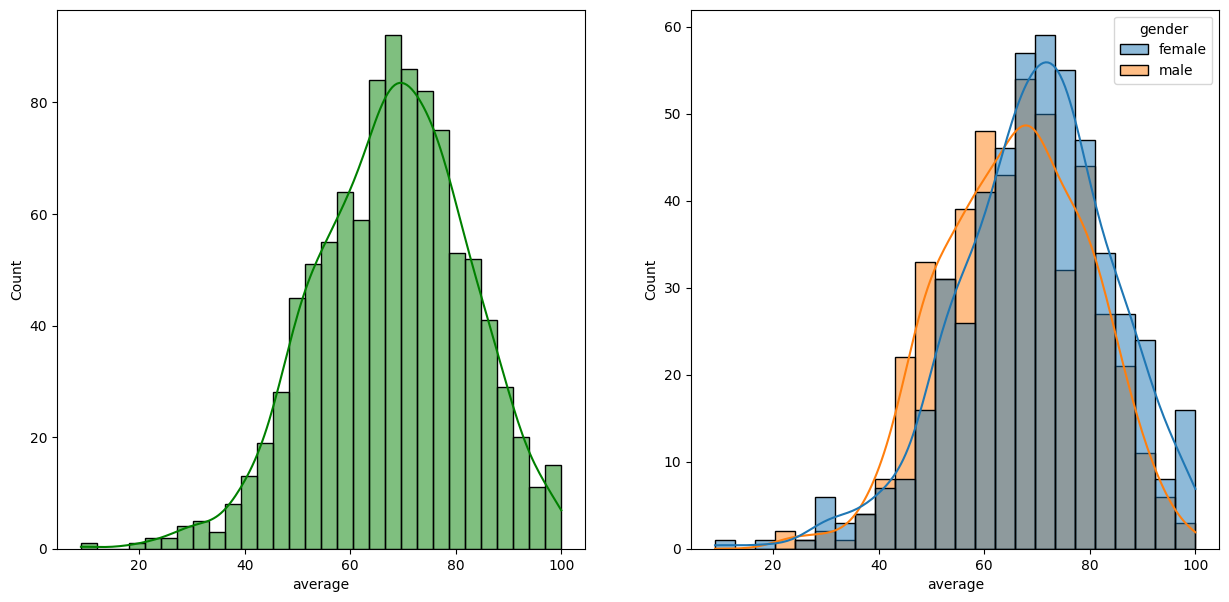

In [80]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

Insights

Female students tend to perform better than male studentss

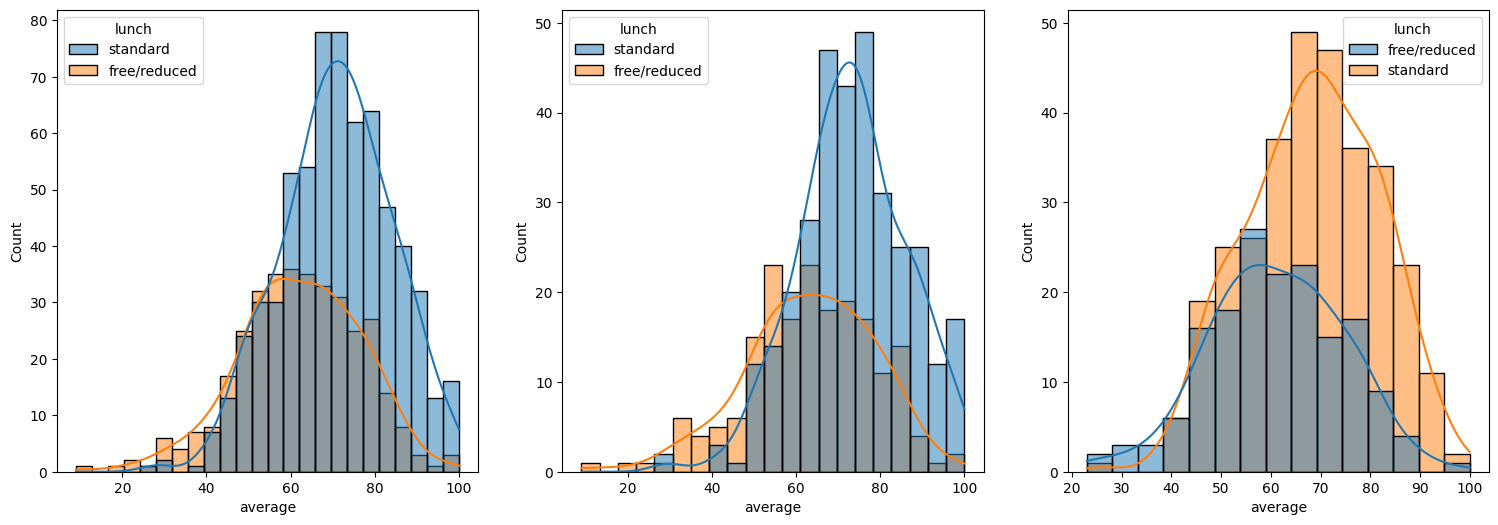

In [81]:
fig,axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


Insights

Standard lunch helps perform well in exams

Standard lunch helps perform well in exams be it male or female

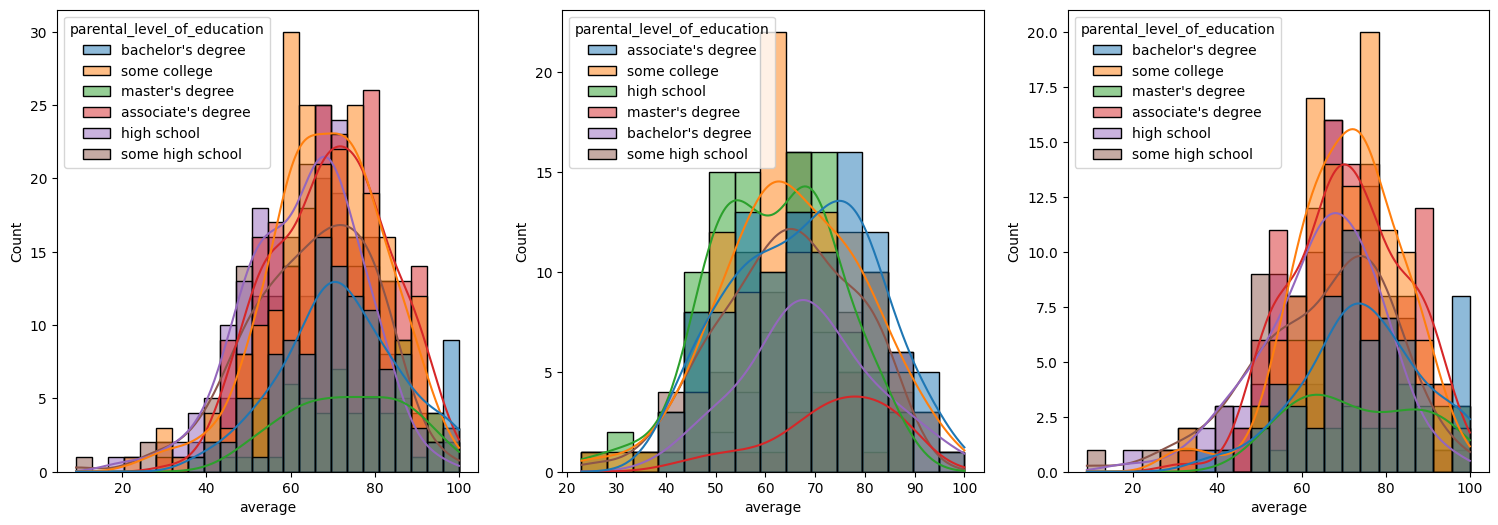

In [82]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights

In general parents education dont help students perform well in exam.\
2nd plot shows that parents whose education is of associate degree or master degree their \
male child tend to perform well in exam\
3rd plot we can see there is no effect of parents education on female students


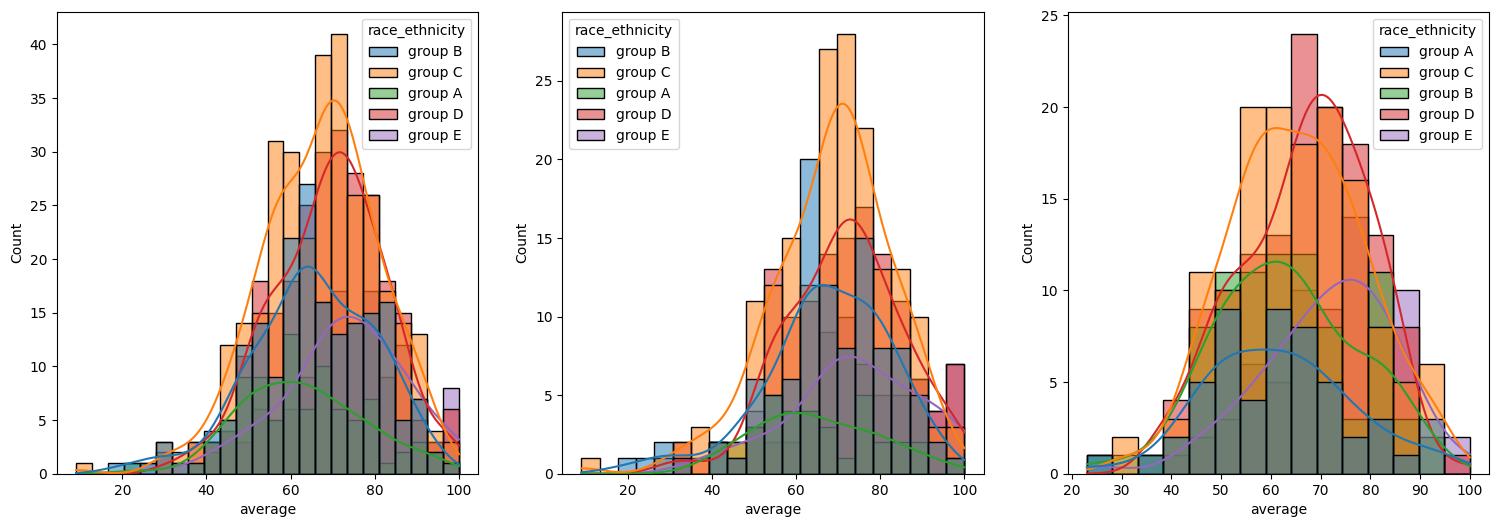

In [83]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

In [84]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


Insights

Students of groups A and group B tends to perform poorly in exam.\
Students of group B tends to perform poorly in exam irrespective of whether 
they are male or female    


Maximum score of Students in all three subjects

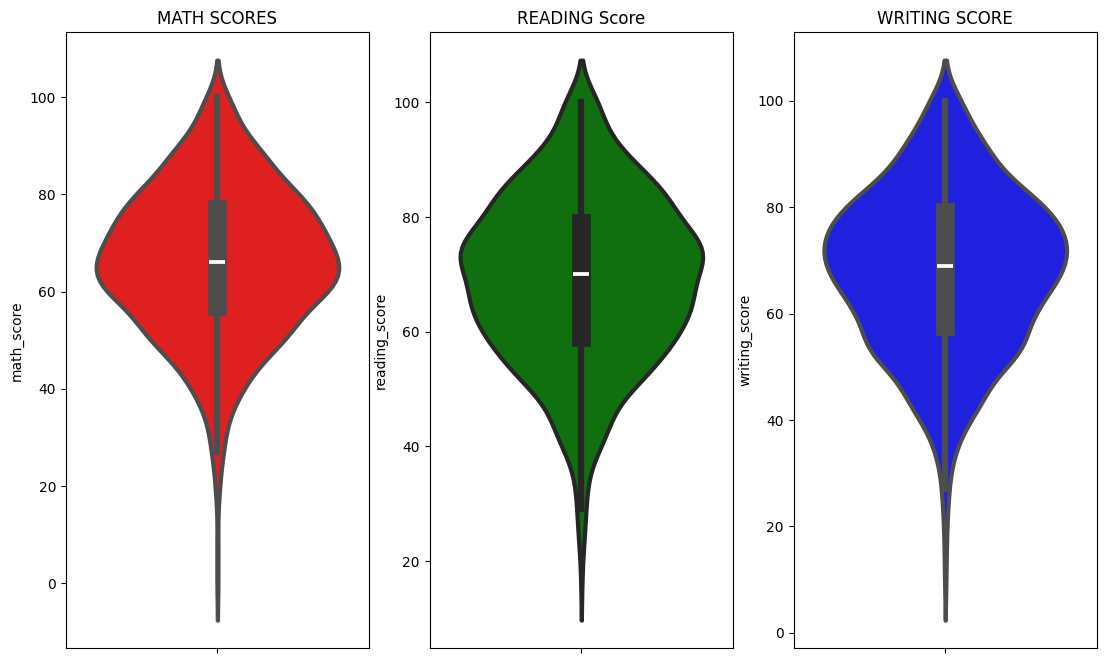

In [85]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING Score')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights

From the above three plots its clearly visible that most of the students score in between 60-80\
in maths where as in reading and writing most of them score from 50-80

Multivariate analysis using pieplot


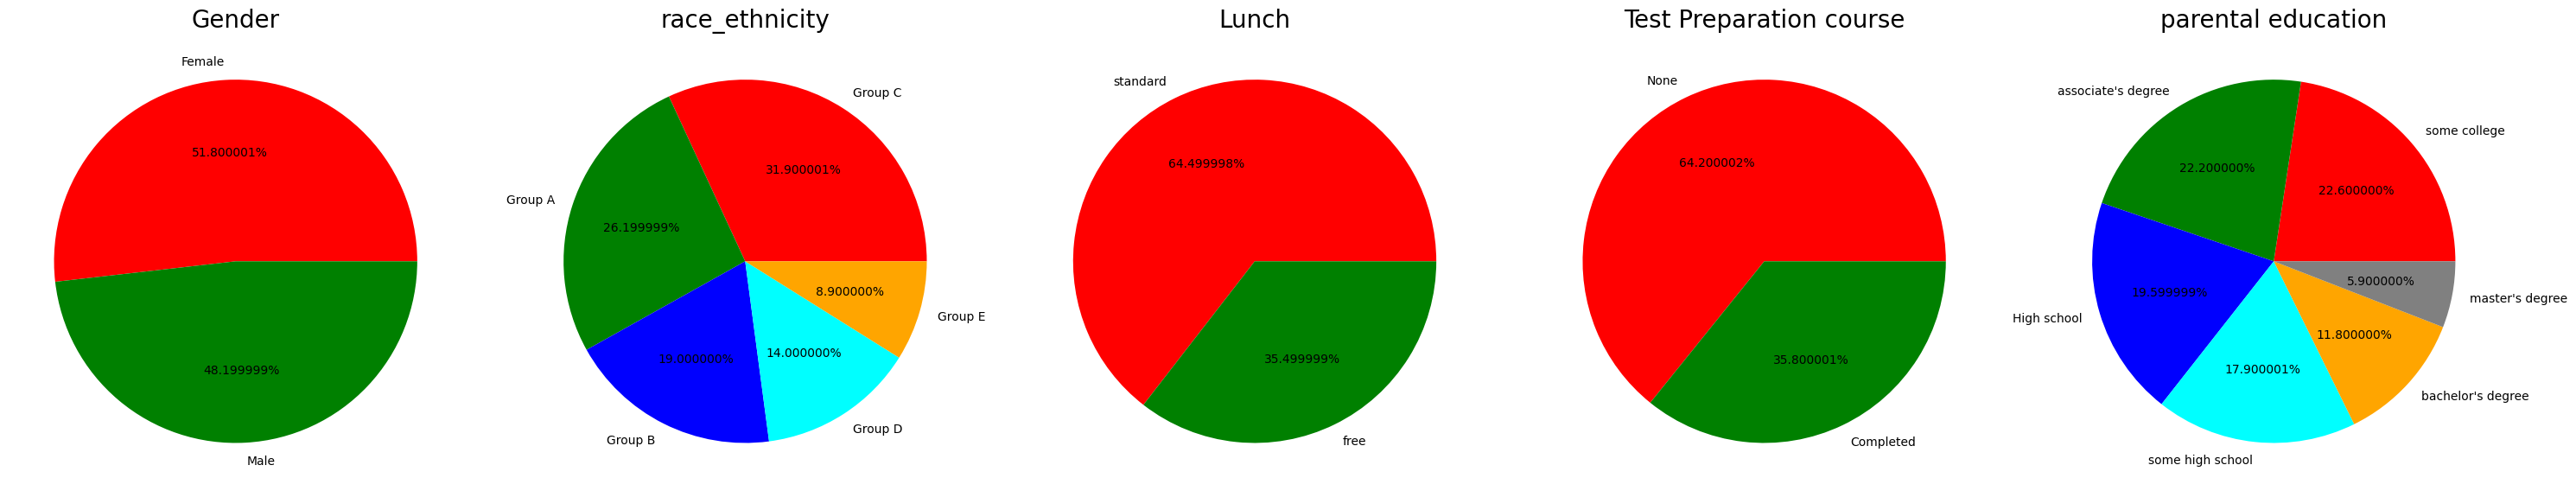

In [86]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='Group C','Group A','Group B','Group D','Group E'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('race_ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='standard','free'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='None','Completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Test Preparation course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels='some college',"associate's degree",'High school','some high school',"bachelor's degree","master's degree"
color=['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('parental education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()






isights

Numbet of Male and Female students is almost equal\
Number of students are greatest in Group C\
Number of students who have standrd lunch are greater\
Number of students who have not enrolled in any test preparation course is greater\
Number of students whose parental education is some college is greater followed clossely by\ 
associte degree

Feature Wise Visualisation

GENDER COLUMN

How is distribution of gender?\
Is gender has any impact on students performance?

UNIVARIATE ANALYSIS(How is distribution of Gender?)


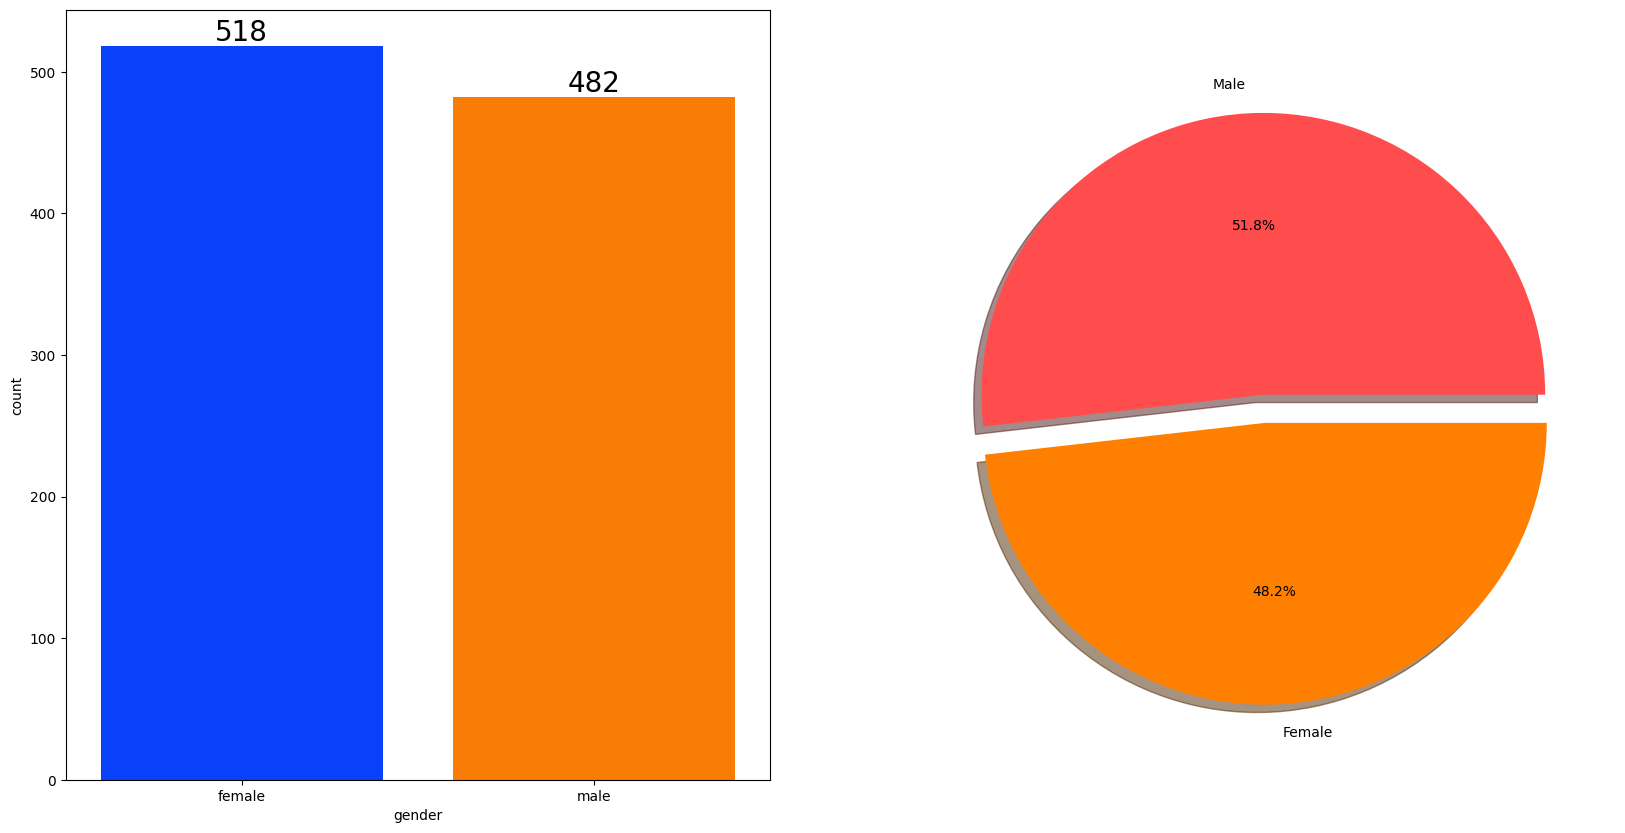

In [87]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male',"Female"],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()    

Insights

Gender has balanced data with female students are 518(48%) and \
male students are 482(52%)    


BIVARIATE ANALYSIS(Is gender has any impact on students performance?)

In [89]:
gender_group = df.groupby('gender')[['average', 'math_score', 'reading_score']].mean()
print(gender_group)

          average  math_score  reading_score
gender                                      
female  69.569498   63.633205      72.608108
male    65.837483   68.728216      65.473029


In [ ]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


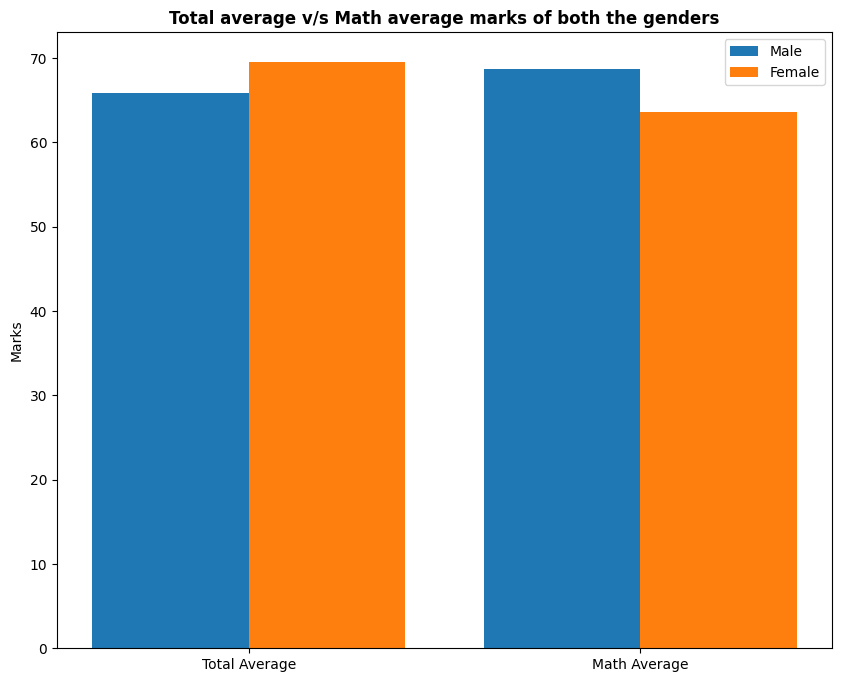

In [90]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

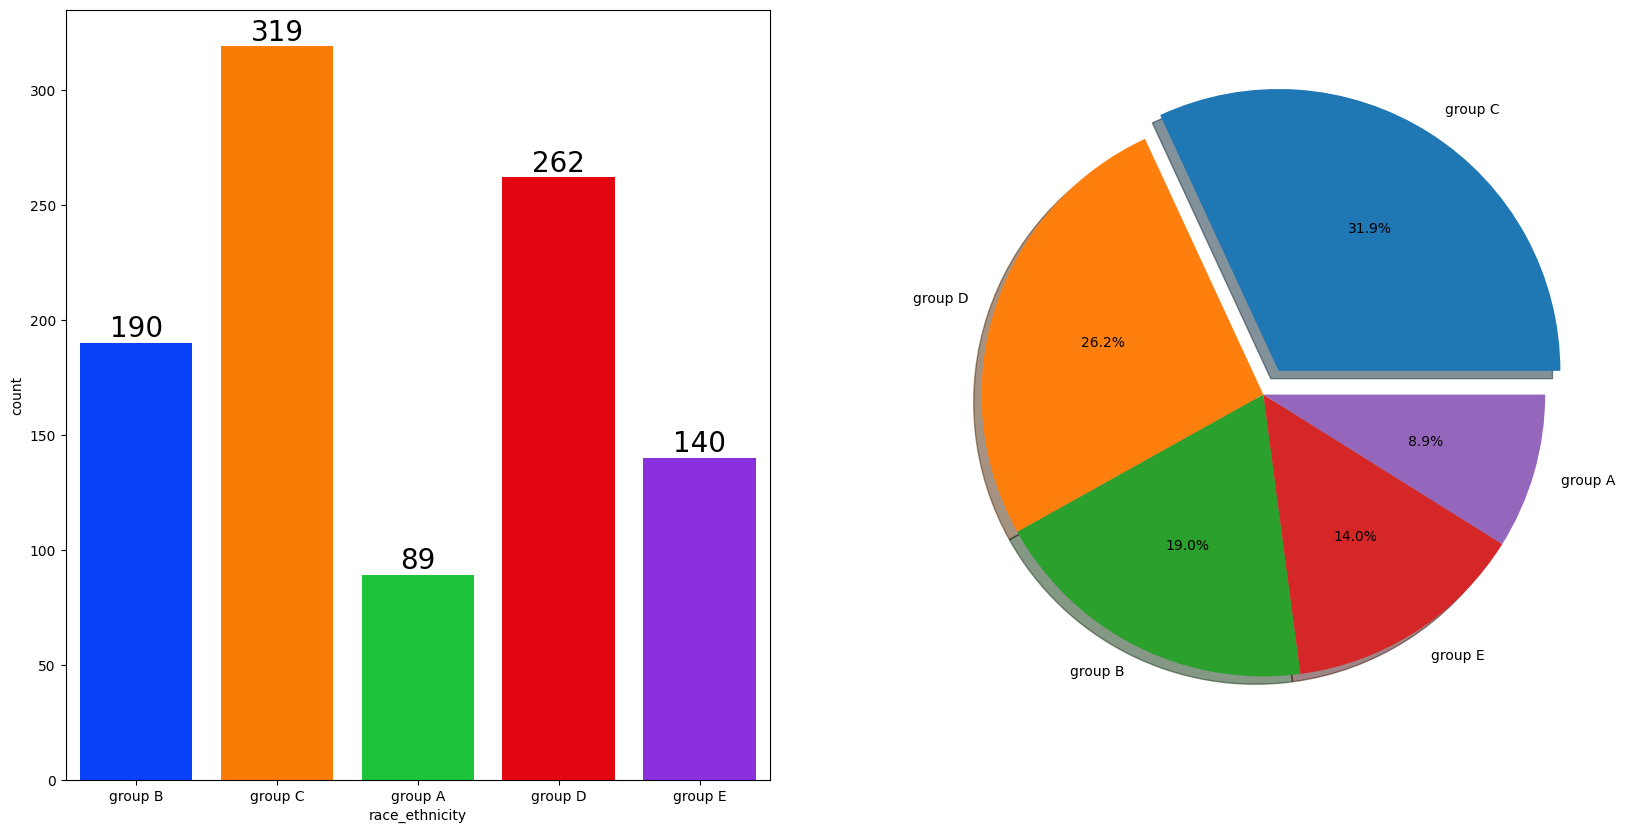

In [93]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

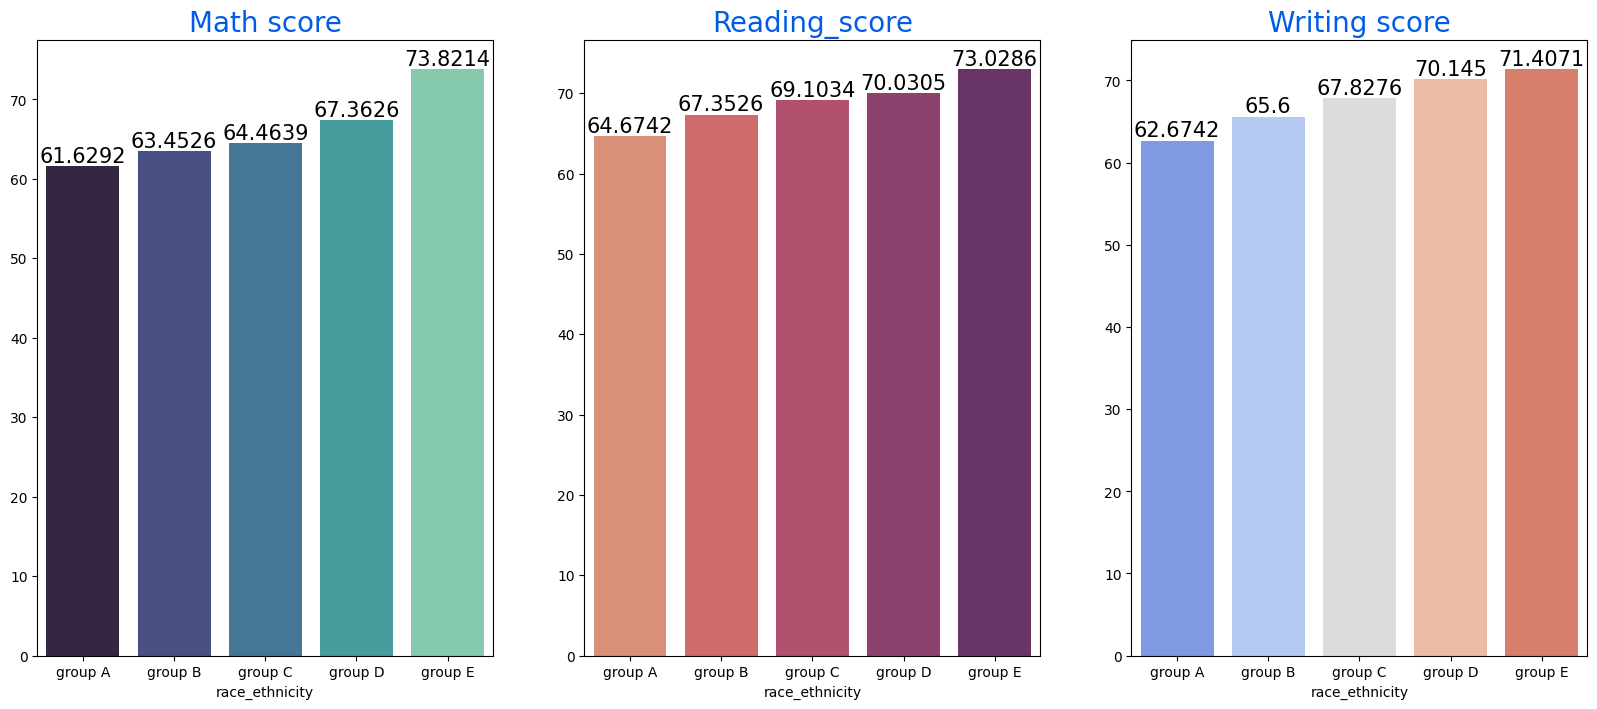

In [94]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

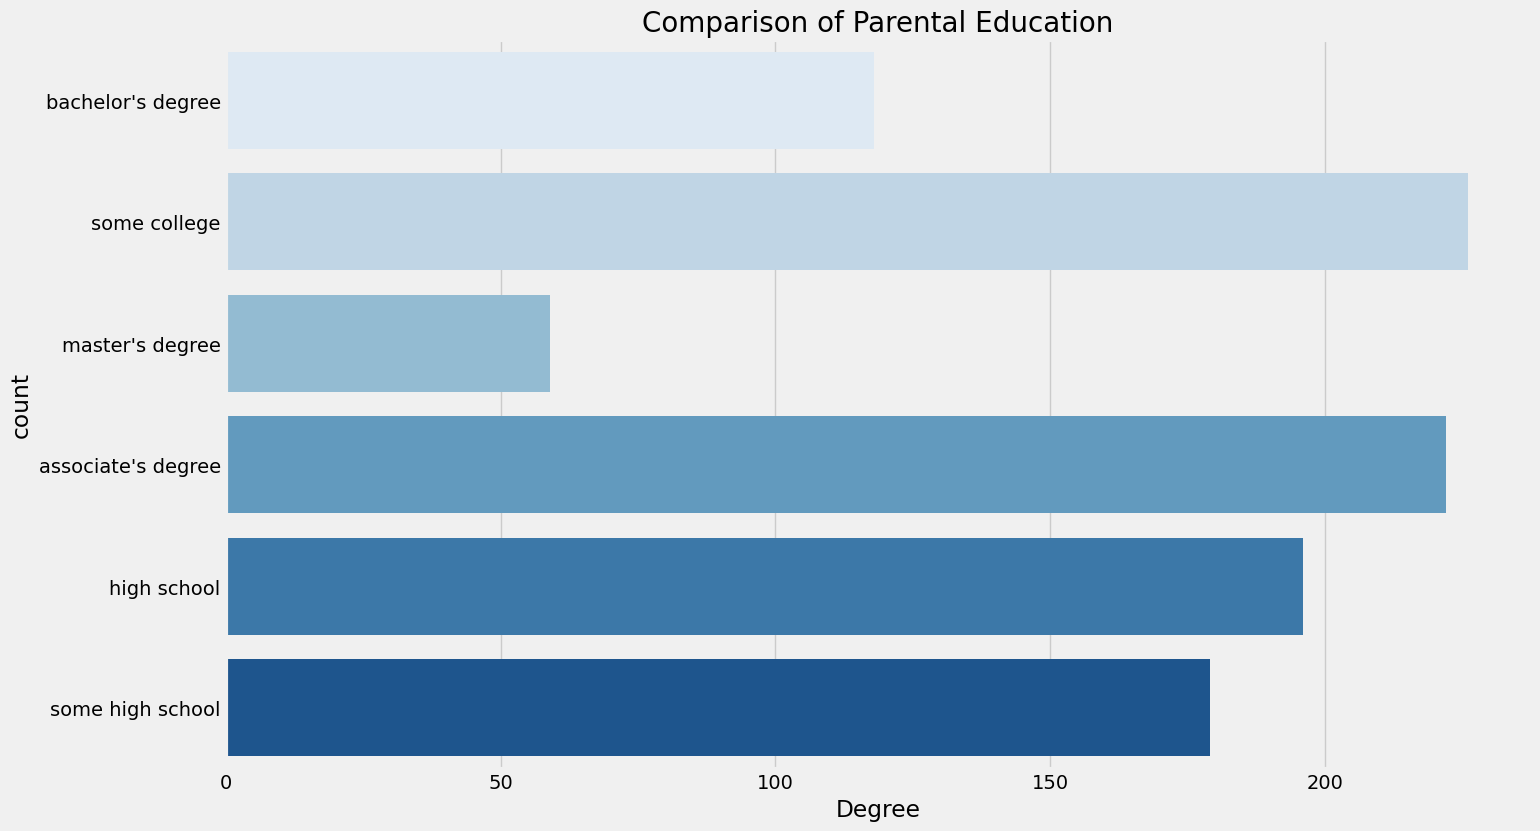

In [95]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

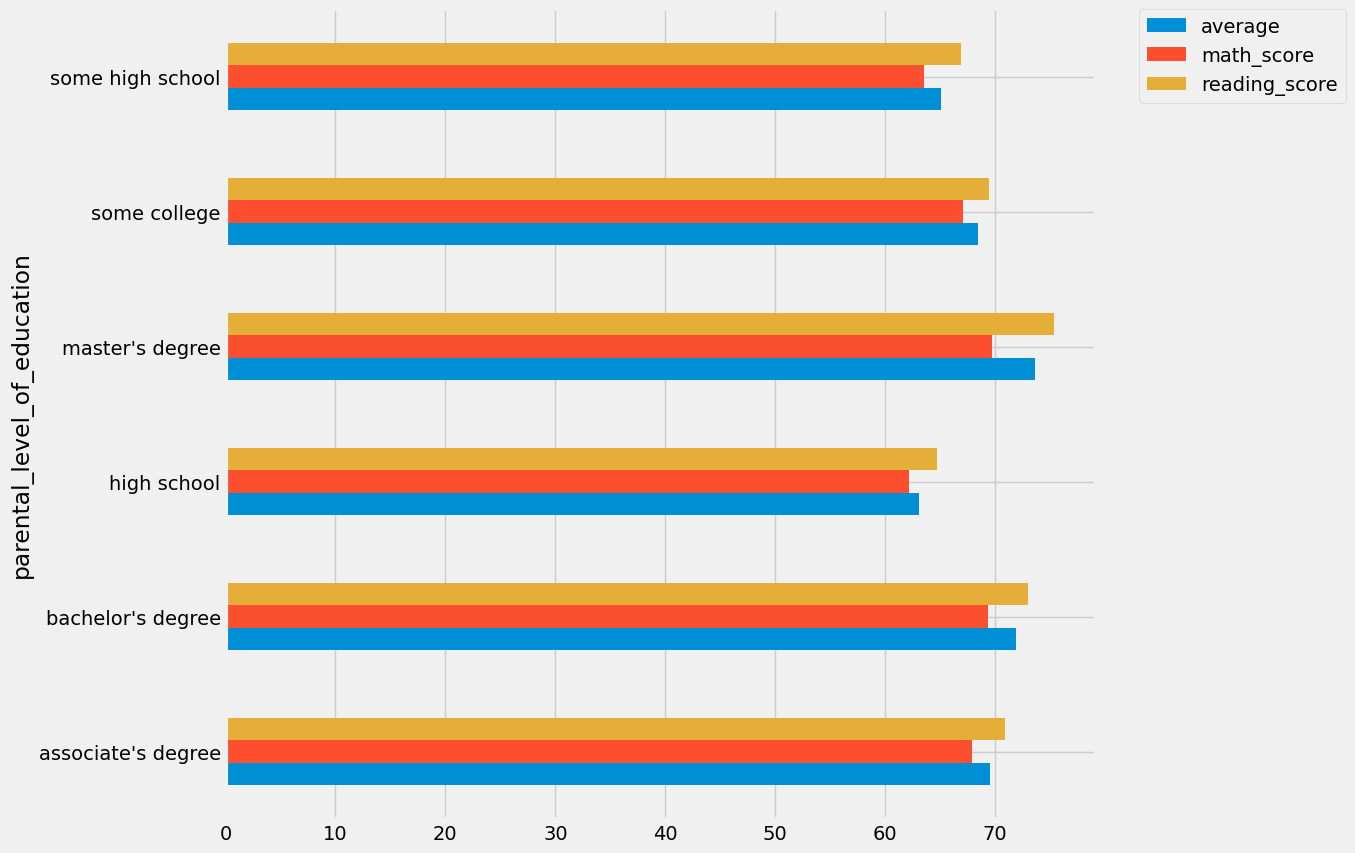

In [97]:
numeric_columns = ['average', 'math_score', 'reading_score']
grouped = df.groupby('parental_level_of_education')[numeric_columns].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

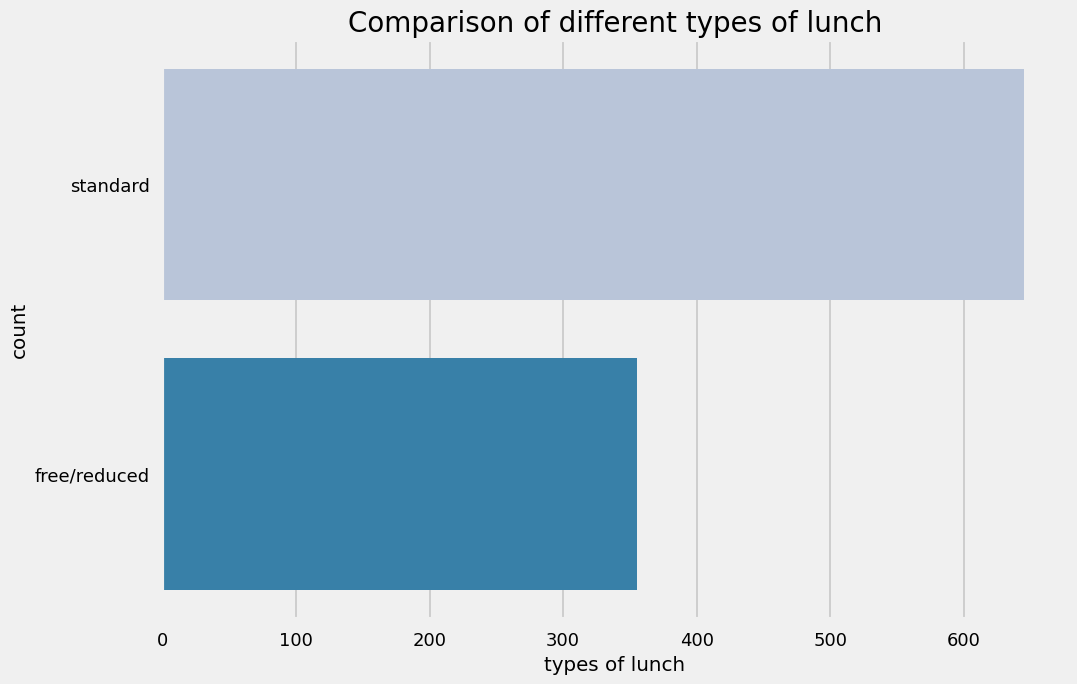

In [98]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

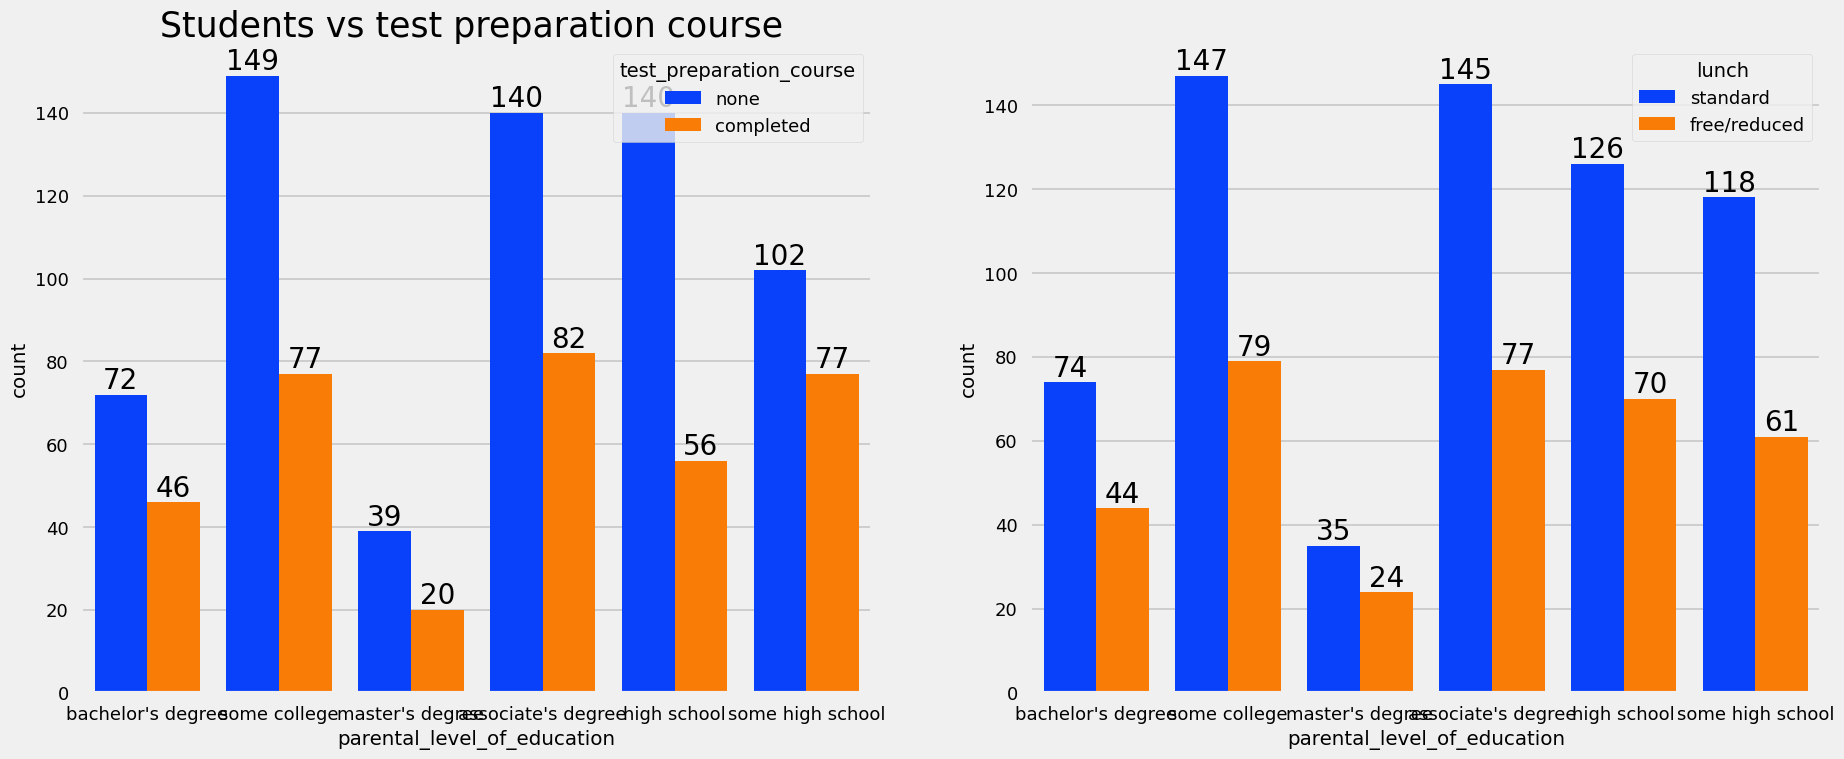

In [100]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

In [99]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


<Axes: xlabel='lunch', ylabel='writing_score'>

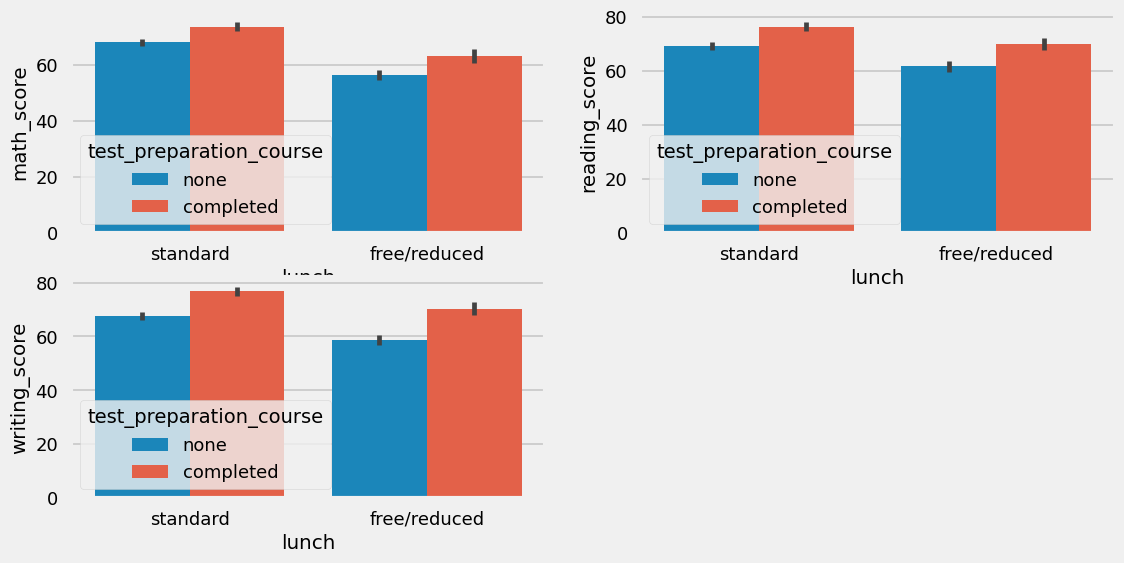

In [104]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

In [109]:
df.head(4
        )

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333


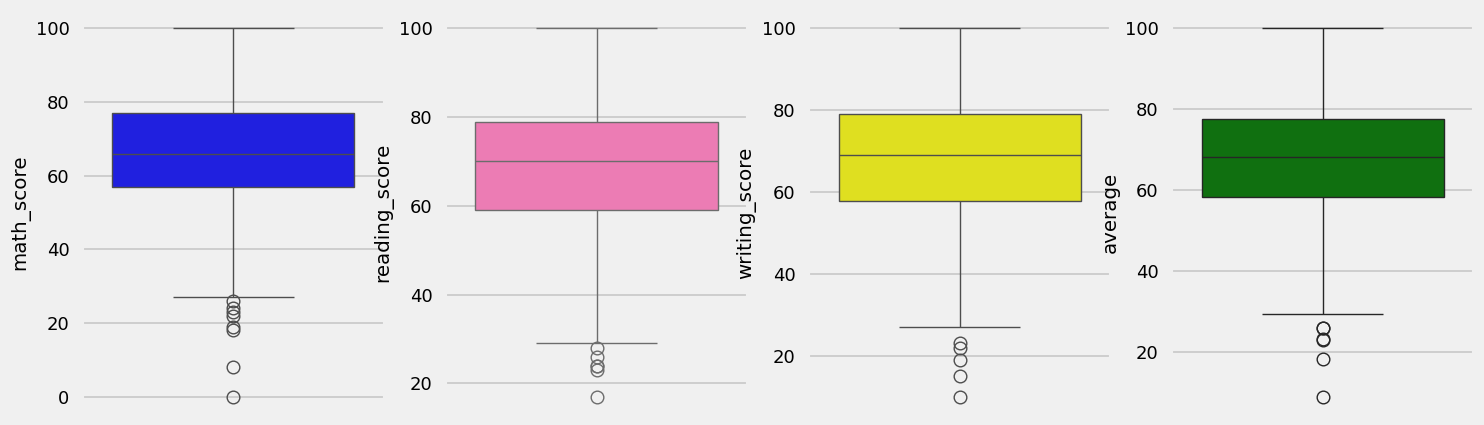

In [108]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='blue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='green')
plt.show()